In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/sparta/food_order.csv')

#이름 오타난거 바꿔주기
nyc_data = df
old_values = ['Big Wong Restaurant \x8c_¤¾Ñ¼', 'Empanada Mama (closed)', 'Chipotle Mexican Grill $1.99 Delivery', "Joe's Shanghai \x8e_À\x8eü£¾÷´", 'Dirty Bird To Go (archived)', 'CafÌ© China']
new_values = ['Big Wong Restaurant', 'Empanada Mama', 'Chipotle Mexican Grill', "Joes Shanghai", 'Dirty Bird To Go', 'Cafe China']
nyc_data['restaurant_name'] = nyc_data['restaurant_name'].replace(old_values, new_values)

#미국 음식점별로 cost_of_the_order, food_preparation_time, delivery_time 평균값 구하기
american_orders = nyc_data.copy()
american_stores = american_orders.groupby('restaurant_name', as_index=False)
average_df =  american_stores.mean(numeric_only=True)[['restaurant_name', 'cost_of_the_order', 'food_preparation_time', 'delivery_time']]
average_df

,restaurant_name,cost_of_the_order,food_preparation_time,delivery_time
0,'wichcraft,8.100000,28.000000,28.000000
1,12 Chairs,22.142500,27.000000,27.750000
2,5 Napkin Burger,15.968000,30.200000,24.400000
3,67 Burger,29.050000,20.000000,28.000000
4,Alidoro,12.610000,34.000000,22.000000
...,...,...,...,...
173,Zero Otto Nove,9.025000,30.000000,21.500000
174,brgr,9.895000,25.000000,25.000000
175,da Umberto,17.620000,24.333333,28.000000
176,ilili Restaurant,19.067778,26.388889,24.888889


In [ ]:
#레스토랑 별 고객 수
customer_count = american_stores['order_id'].count()
customer_count.columns = ['restaurant_name', 'num_of_orders']
customer_count = customer_count.sort_values(by='num_of_orders', ascending=False)

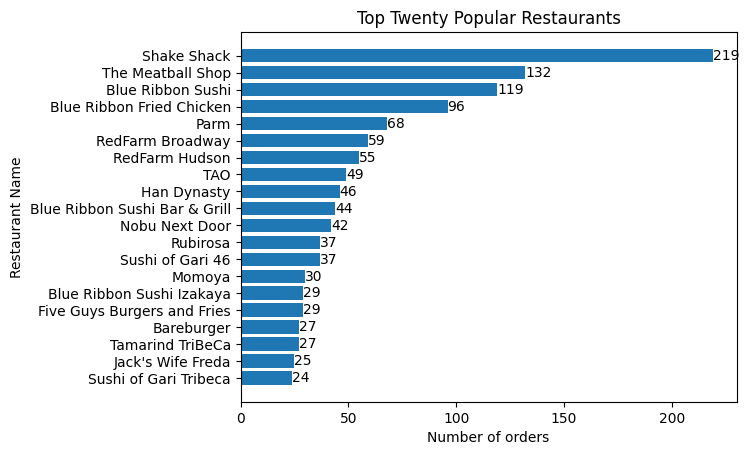

In [ ]:
#고객 수 상위 10 개 음식점 이름 추출하기
top_ten = customer_count.head(20)
top_ten = top_ten.sort_values(by='num_of_orders', ascending=True)

#그래프 그리기
fig, ax = plt.subplots()
bars = plt.barh(top_ten['restaurant_name'], top_ten['num_of_orders'])
ax.bar_label(bars)
plt.ylabel('Restaurant Name')
plt.xlabel('Number of orders')
plt.title('Top Twenty Popular Restaurants')

plt.show()

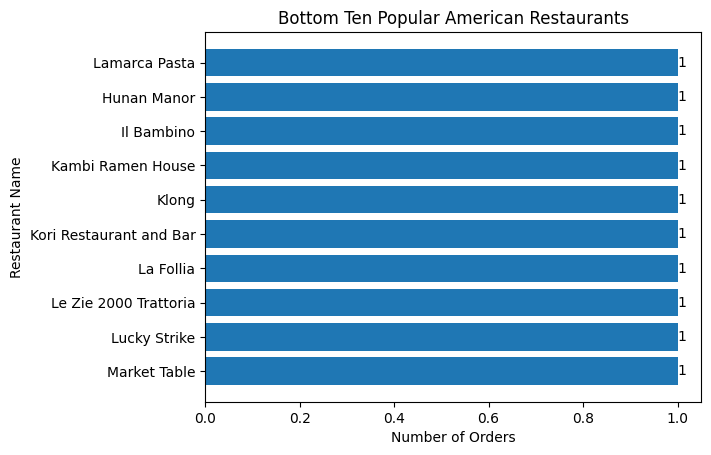

In [ ]:
#고객 수 하위 10개 음식점 이름 추출하기
bottom_ten = customer_count.tail(10)

#그래프 그리기
fig, ax = plt.subplots()
bars = plt.barh(bottom_ten['restaurant_name'], bottom_ten['num_of_orders'])
ax.bar_label(bars)
plt.ylabel('Restaurant Name')
plt.xlabel('Number of Orders')
plt.title('Bottom Ten Popular American Restaurants')

plt.show()

In [ ]:
# 우리가 원하는 컬럼 -- cost_of_orders, average_price, average_preparation_time
# 가설: 주문 금액이 낮으면 사람들이 더 많이 올 것이고, 요리 준비시간과 배달시간이 짧으면 더 많이 올 것이다.

# 고객 수 테이블과 평균 테이블을 합치고 상관관계를 구한다 (모든 미국 레스토랑 데이터를 사용)
average_df = average_df.merge(customer_count, on='restaurant_name')
corr_for_customers = average_df.corr(method='pearson',  numeric_only=True)['num_of_customers']
corr_for_customers = corr_for_customers.drop('num_of_customers')

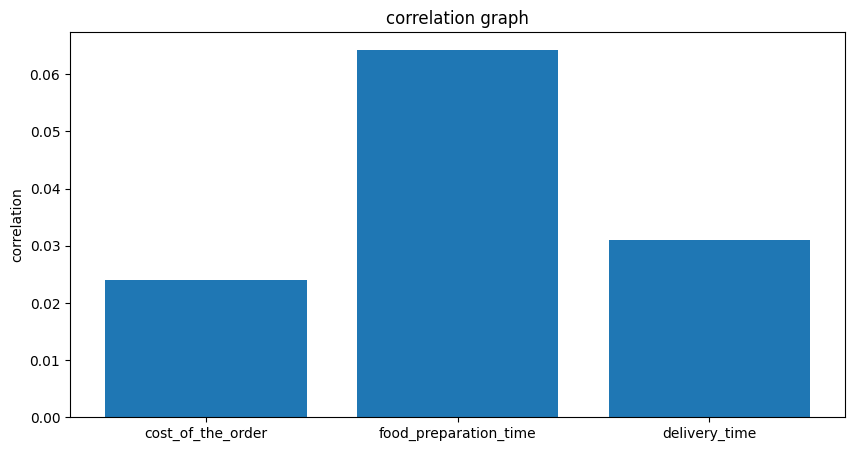

In [ ]:
plt.figure(figsize=(10,5))

plt.bar(corr_for_customers.index, corr_for_customers.values)

plt.title('correlation graph')

plt.ylabel('correlation')

plt.show()

In [ ]:
# 배달시간 + 주문시간 = 새로운 컬럼 생성
nyc_data['total_prep_time'] = nyc_data['food_preparation_time'] + nyc_data['delivery_time']
nyc_data

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_prep_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49
...,...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill,Mexican,22.31,Weekend,5,31,17,48
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19,50
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24,55
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31,54


In [ ]:
#고객 수 상위 2개, 나머지 음식점으로 나눠서 비교해본다.
total_num = len(customer_count.index)
top = customer_count.head(2)
bottom = customer_count.tail(total_num - 2)

top_res = nyc_data[nyc_data['restaurant_name'].isin(top['restaurant_name'])]
top_res.agg(['mean', 'median'])

<ipython-input-161-2cd01b2980a3>:7: FutureWarning: ['restaurant_name', 'cuisine_type', 'day_of_the_week', 'rating'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  top_res.agg(['mean', 'median'])


,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time,total_prep_time
mean,1.477520e+06,188885.133333,16.640698,27.71746,24.504762,52.222222
median,1.477545e+06,143984.000000,14.940000,28.00000,25.000000,52.000000


In [ ]:
bottom_res = nyc_data[nyc_data['restaurant_name'].isin(bottom['restaurant_name'])]
bottom_res.agg(['mean', 'median'])

<ipython-input-162-6e1eee6d0920>:2: FutureWarning: ['restaurant_name', 'cuisine_type', 'day_of_the_week', 'rating'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  bottom_res.agg(['mean', 'median'])


,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time,total_prep_time
mean,1.477467e+06,173342.099738,16.036667,27.173228,23.952756,51.125984
median,1.477403e+06,127149.000000,14.020000,27.000000,24.000000,51.000000


In [ ]:
# 미국 레스토랑 뿐만 아니라 다른 나라의 레스토랑 주문 데이터를 포함한다.
# 고객 수 vs 평균 준비시간, 주문금액의 상관관계를 구한다.
group_by_rest = nyc_data.groupby('restaurant_name', as_index=False)
coc = group_by_rest['customer_id'].count()
coc.columns = ['restaurant_name', 'customer_count']
group_by_rest = group_by_rest.mean(numeric_only=True)
prep_timedf = group_by_rest[['restaurant_name', 'total_prep_time', 'cost_of_the_order']]
prep_timedf = prep_timedf.merge(coc, on='restaurant_name')
corr_graph = prep_timedf.corr(method='pearson', numeric_only=True)
corr_graph = corr_graph.drop('customer_count')
corr_graph

,total_prep_time,cost_of_the_order,customer_count
total_prep_time,1.00000,-0.00752,0.006762
cost_of_the_order,-0.00752,1.00000,-0.003345


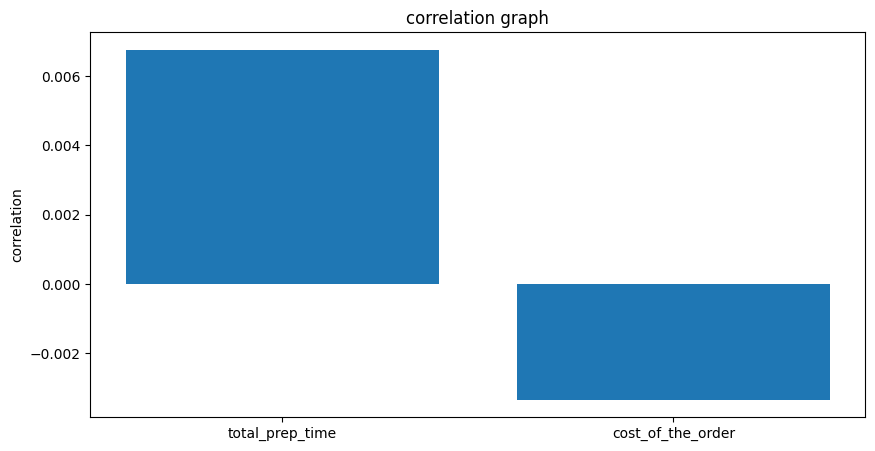

In [ ]:
plt.figure(figsize=(10,5))

plt.bar(corr_graph.index, corr_graph['customer_count'])

plt.title('correlation graph')

plt.ylabel('correlation')

plt.show()